# Seaborn数据分析

披萨店顾客数据，图形化分析

In [1]:
import seaborn as sns

In [2]:
# 内置数据集
tips=sns.load_dataset('tips')

In [3]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## 带状图

离散数据 和 连续数据 之间的关系

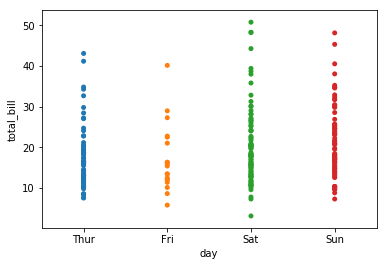

In [27]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False)

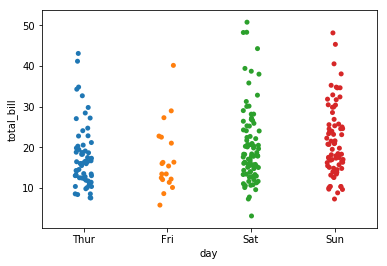

In [28]:
#jitter 抖动
sns.stripplot(x='day', y='total_bill', data=tips)

## 蜂群图

离散数据 和 连续数据 之间的关系——密度排列

带状图的补充

不允许在一起

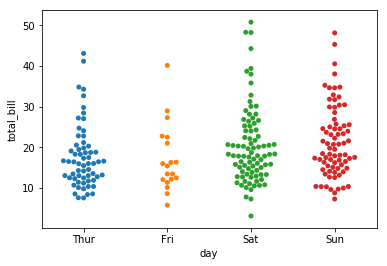

In [29]:
sns.swarmplot(x='day', y='total_bill', data=tips)

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 3.Hue-分组参数

分析每天中，午餐和晚餐的账单分布

周六 都是晚上吃饭？晚上去放松

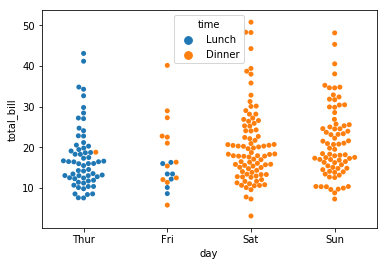

In [19]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='time')

每天的付账人群中的性别分布

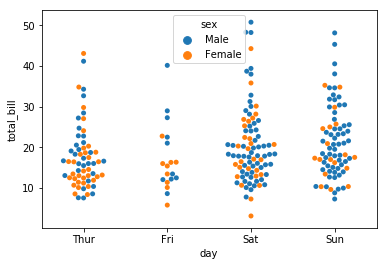

In [20]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

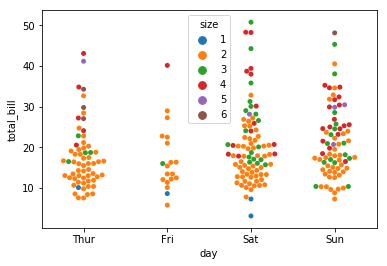

In [30]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='size')

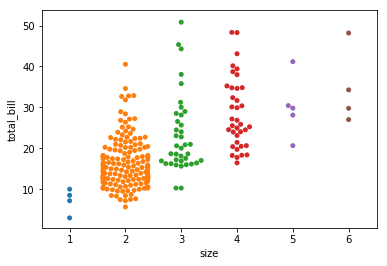

In [22]:
sns.swarmplot(data=tips, x='size', y='total_bill')

pizza的不同size的基础价格

In [19]:
tips['size'].corr(tips['total_bill'])

0.59831513090490129

## 箱线图

中位数、1/4位点、3/4位点、min、max、离散点分布

高斯分布，基本包括96%

之外的是离群点，小概率，分布不规律

表示total_bill的概率分布

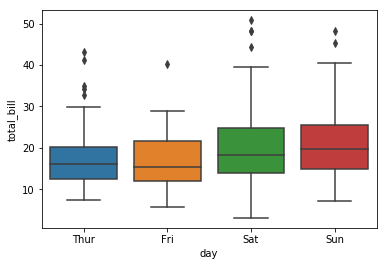

In [24]:
sns.boxplot('day', 'total_bill',data=tips)

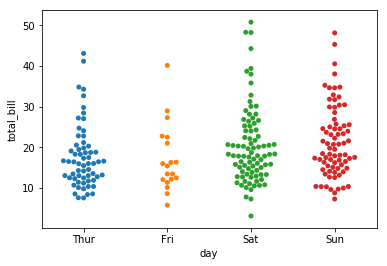

In [26]:
sns.swarmplot('day', 'total_bill', data=tips)

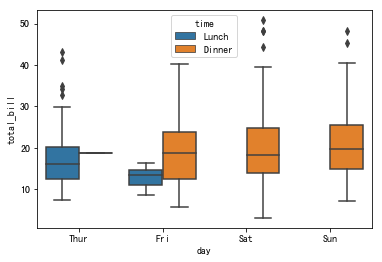

In [25]:
sns.boxplot('day', 'total_bill', data=tips, hue='time')

## 提琴图

对称, 概率密度

把正态分布画出来

In [34]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

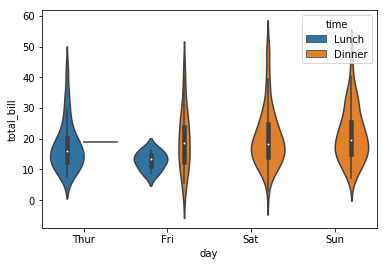

In [37]:
sns.violinplot('day', 'total_bill', data=tips, hue='time')

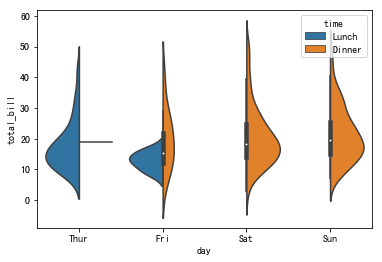

In [28]:
# 只需看1半
sns.violinplot('day', 'total_bill', data=tips, hue='time', split=True)

## 多图展示

花朵里的种子

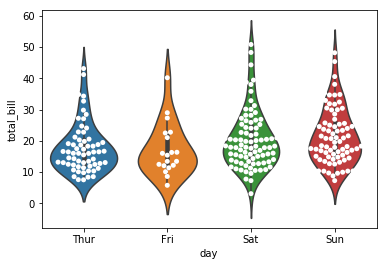

In [51]:
sns.violinplot('day', 'total_bill', data=tips)
sns.swarmplot('day', 'total_bill', data=tips, color='white')

# 单一变量估计

多与少，频度、每天交易数量

离散型数据的频次统计

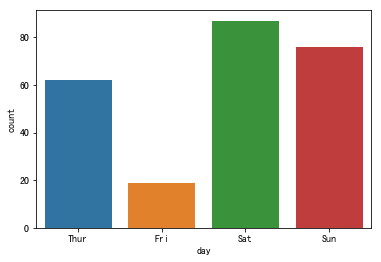

In [33]:
sns.countplot('day', data=tips)

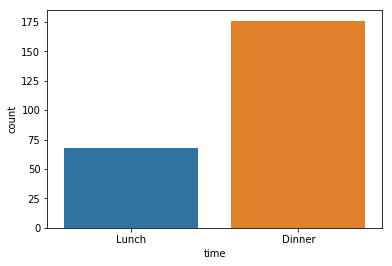

In [43]:
sns.countplot('time', data=tips)

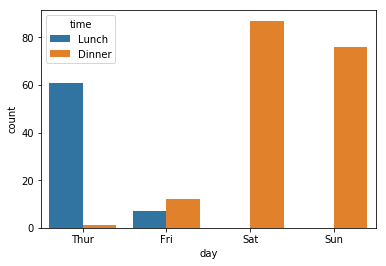

In [41]:
sns.countplot('day', data=tips, hue='time')

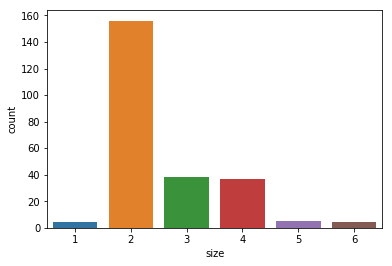

In [42]:
sns.countplot('size', data=tips)

# 连续型数据的核密度估计

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


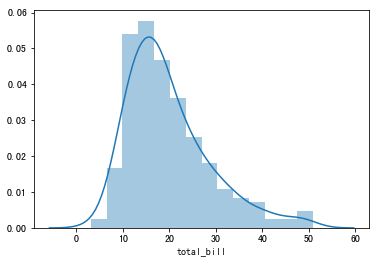

In [44]:
sns.distplot(tips['total_bill'])

#### 抵消偏度

拉成比较偏正态的函数？

小技巧，不要太多使用！可以尝试

降阶取log，只描述宏观场景，微观细节给抵消了

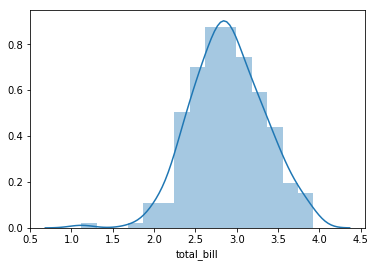

In [44]:
import numpy as np
sns.distplot(np.log(tips['total_bill']))

## 抽取前 99.5%的数据（去掉离散值的方法）
2$\sigma$

In [46]:
np.percentile(tips['total_bill'], 99.5)

48.317099999999996

In [45]:
# 离群点，可将其去掉
tips[tips['total_bill']>48.31]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4


## 带回归的散点图

看相关性

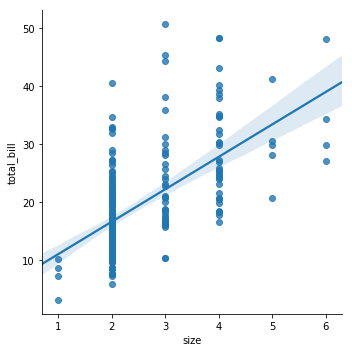

In [52]:
sns.lmplot('size', 'total_bill', data=tips)

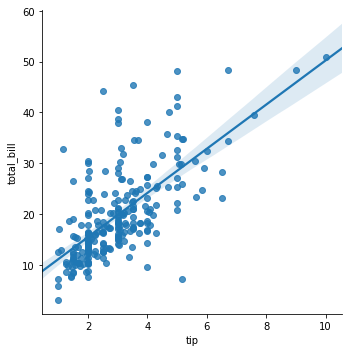

In [54]:
sns.lmplot('tip', 'total_bill', data=tips)

## 联合分布（既有散点的特性，又有线性回归，同时还有概率估计）

基本呈正态分布

自然存在的东西，基本都属于正态分布

每天花销，购物量，记记账

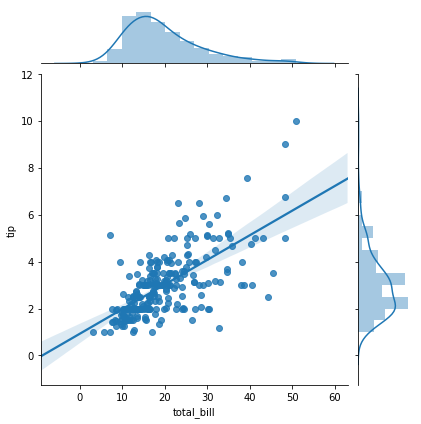

In [53]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')